# I) Imports

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 500


df_text_versions = pd.read_csv("../raw_data/deep_course_cf_text_versions.csv", low_memory = False)
df_text_versions_node = pd.read_csv("../raw_data/deep_course_cf_text_version_nodes.csv", low_memory = False)
df_themes = pd.read_csv("../raw_data/deep_course_cf_themes.csv", low_memory = False)
df_types = pd.read_csv("../raw_data/deep_course_cf_types.csv", low_memory = False)
df_nodes = pd.read_csv("../raw_data/deep_course_cm_nodes.csv", low_memory = False)

df_formulaire_question = pd.read_csv("../raw_data/deep_course_formulaire_question.csv", low_memory = False)
df_formulaire_questionnaire = pd.read_csv("../raw_data/deep_course_formulaire_questionnaire.csv", low_memory = False)
df_formulaire_questionnaire_pages = pd.read_csv("../raw_data/deep_course_formulaire_questionnaire_pages.csv", low_memory = False)
df_formulaire_question_choix = pd.read_csv("../raw_data/deep_course_formulaire_question_choix.csv", low_memory = False)
df_formulaire_reponse = pd.read_csv("../raw_data/deep_course_formulaire_reponse.csv", low_memory = False)
df_formulaire_page_questions = pd.read_csv("../raw_data/deep_course_formulaire_page_questions.csv", low_memory = False)

# II) Bases des textes

In [2]:
df_text_versions.head(2)
#base des textes réglementaires avec leur titre, ID, id du thème et le id du type de document (applicable ou non)

,surrogate_uuid,group_id,txt_name,theme_id,type_id
0,2c90f588404b484801404d8600d87748,TXA9548,RÈGLEMENT (UE) N°715/2013 DE LA COMMISSION du 25 juillet 2013 établissant les critères permettant de déterminer à quel moment les débris de cuivre cessent d’être des déchets au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33
1,2c90f588404b484801404dce49f11efc,TXA9550,Arrêté du 16 juillet 2013 fixant le barème hors taxes des redevances prévues à l'article L. 554-5 du code de l'environnement pour l'année 2013,ff8081816b4d71ef016b54e0b788416d,4028807d16245e4d01162524db946b37


In [3]:
df_text_versions.describe()

,surrogate_uuid,group_id,txt_name,theme_id,type_id
count,3515,3515,3515,3515,3515
unique,3515,3515,3485,53,17
top,2c90f588592da60801594a3d16e140b2,TXA4702,Arrêté du 26 février 2009 portant agrément d'un organisme pour effectuer le contrôle périodique de certaines catégories d'installations classées soumises à déclaration,4028807d16245e4d01162524c9ec6a71,4028807d16245e4d01162524db946b37
freq,1,1,6,550,1079


In [4]:
df_themes.columns = df_themes.columns.str.replace('id','theme_id')
df_themes #base des thèmes des textes

,theme_id,domain,theme
0,4028807d16245e4d01162524d4216aef,3. SÉCURITÉ,CSE / CHSCT
1,d37394c53120b52601313c3107f77043,3. SÉCURITÉ,Remontées mécaniques - Transports guidés/personnes
2,4028807d16245e4d01162524d6f26b13,4. INSPECTION,Equipements sous pression
3,d37394c5208c61e80120f1fb613810d9,8. SECURITE ALIMENTAIRE,Sécurité alimentaire
4,4028807d16245e4d01162524cd016a95,3. SÉCURITÉ,Personnel
5,4028807d16245e4d01162524cc546a8c,3. SÉCURITÉ,Locaux
6,4028807d16245e4d01162524ce806aa7,3. SÉCURITÉ,"Equipements de travail, Machines, outils"
7,4028807d16245e4d01162524cbab6a83,3. SÉCURITÉ,Principes Généraux Sécurité
8,4028807d16245e4d01162524cdc16a9e,3. SÉCURITÉ,Incendie/Explosion
9,4028807d16245e4d01162524cfda6ab9,3. SÉCURITÉ,Risques biologiques


In [5]:
df = pd.merge(df_text_versions, df_themes, on='theme_id')

In [6]:
df

,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme
0,2c90f588404b484801404d8600d87748,TXA9548,RÈGLEMENT (UE) N°715/2013 DE LA COMMISSION du 25 juillet 2013 établissant les critères permettant de déterminer à quel moment les débris de cuivre cessent d’être des déchets au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets
1,2c90f588404b48480140c977cca41ca5,TXA9125,Arrêté du 7 février 2012 relatif aux exemples d'application des critères précisant la notion d'« emballage » définis à l'article R. 543-43 du code de l'environnement,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets
2,2c90f588404b48480140ee759ba52230,TXA6677,Circulaire du 11 juillet 2007 relative à la publication du règlement 1013/2006 relatif au transfert de déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524e34f6ba3,1. ENVIRONNEMENT,Déchets
3,2c90f5884102f682014104de48a05ac6,TXA9592,Circulaire du 3 juillet 2013 relative aux transferts transfrontaliers de déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524e34f6ba3,1. ENVIRONNEMENT,Déchets
4,2c90f5884357e1e9014358f48532760a,TXA9183,Décret n° 2012-542 du 23 avril 2012 pris pour l'application de l'article L. 542-1-2 du code de l'environnement et établissant les prescriptions du Plan national de gestion des matières et des déchets radioactifs,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524e48d6bb5,1. ENVIRONNEMENT,Déchets
5,2c90f58844752985014488e27e351ffa,TXA9285,Arrêté du 2 août 2012 relatif aux principes du système de gestion de la qualité mentionné à l'article D. 541-12-14 du code de l'environnement,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets
6,2c90f588456c31f50145d22b86454926,TXA8834,Arrêté du 3 février 2011 relatif aux informations à transmettre à l'Agence nationale pour la gestion des déchets radioactifs en vue de l'édition 2012 de l'inventaire national des matières et déchets radioactifs,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets
7,2c90f58846fdd49601476d7519a334ea,TXA6524,"Règlement (CE) n° 1418/2007 du 29 novembre 2007 concernant l’exportation de certains déchets destinés à être valorisés, énumérés à l’annexe III ou IIIA du règlement n° 1013/2006 du Parlement européen et du Conseil vers certains pays auxquels la décision de l’OCDE sur le contrôle des mouvements transfrontières de déchets ne s’applique pas.",4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets
8,2c90f588478935cf0147a05a34d8596d,TXA3393,Arrêté du 7 septembre 1999 relatif au contrôle des filières d'élimination des déchets d'activités de soins à risques infectieux et assimilés et des pièces anatomiques,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets
9,2c90f5884939605901493d010cd40554,TXA9785,"Arrêté du 8 octobre 2014 relatif aux conditions de mise en œuvre des obligations de reprise par les distributeurs des équipements électriques et électroniques usagés, prévu à l'article R. 543-180 du code de l'environnement",4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets


In [7]:
df_types

,id,applicabilité
0,2c90f58962265e150162520dfe7c6281,Pour information
1,4028807d16245e4d01162524e20d6b91,Applicable
2,4028807d16245e4d01162524db946b37,Applicable
3,4028807d16245e4d01162524de2f6b5b,Applicable
4,4028807d16245e4d01162524df706b6d,Applicable
5,4028807d16245e4d01162524e0ba6b7f,Applicable
6,4028807d16245e4d01162524e7276bd9,Applicable
7,4028807d16245e4d01162524ec3c6c21,Pour information
8,d37394c5272f761f01273d899b5811d1,Pour information
9,4028807d16245e4d01162524eec86c45,Pour information


In [8]:
df_types.columns = df_types.columns.str.replace('id','type_id')
df_types  #id du type de document, applicabilité ou non

,type_id,applicabilité
0,2c90f58962265e150162520dfe7c6281,Pour information
1,4028807d16245e4d01162524e20d6b91,Applicable
2,4028807d16245e4d01162524db946b37,Applicable
3,4028807d16245e4d01162524de2f6b5b,Applicable
4,4028807d16245e4d01162524df706b6d,Applicable
5,4028807d16245e4d01162524e0ba6b7f,Applicable
6,4028807d16245e4d01162524e7276bd9,Applicable
7,4028807d16245e4d01162524ec3c6c21,Pour information
8,d37394c5272f761f01273d899b5811d1,Pour information
9,4028807d16245e4d01162524eec86c45,Pour information


## Base de données des textes - jointure finale

In [9]:
df_text = pd.merge(df, df_types, on="type_id")

In [10]:
df_text

,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme,applicabilité
0,2c90f588404b484801404d8600d87748,TXA9548,RÈGLEMENT (UE) N°715/2013 DE LA COMMISSION du 25 juillet 2013 établissant les critères permettant de déterminer à quel moment les débris de cuivre cessent d’être des déchets au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
1,2c90f58846fdd49601476d7519a334ea,TXA6524,"Règlement (CE) n° 1418/2007 du 29 novembre 2007 concernant l’exportation de certains déchets destinés à être valorisés, énumérés à l’annexe III ou IIIA du règlement n° 1013/2006 du Parlement européen et du Conseil vers certains pays auxquels la décision de l’OCDE sur le contrôle des mouvements transfrontières de déchets ne s’applique pas.",4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
2,2c90f589515fb45c01516335125951f6,TXA5166,Règlement (CE) n° 1013/2006 du Parlement européen et du Conseil du 14 juin 2006 concernant les transferts de déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
3,4028807d16245e4d0116254356975904,TXA3451,Règlement du Conseil n° 259/93 du 1er février 1993 concernant la surveillance et le contrôle des transferts de déchets à l'entrée et à la sortie de la Communauté européenne,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
4,4028807d16245e4d01162546ca9d716c,TXA6370,Règlement n° 574/2004 de la Commission du 23 février 2004 modifiant les annexes I et III du règlement (CE) n° 2150/2002 du Parlement europ éen et du Conseil relatif aux statistiques sur les déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
5,d37394453bb51e7d013bbc9581311dbc,TXA9353,Règlement (UE) no 1179/2012 de la Commission du 10 décembre 2012 établissant les critères permettant de déterminer à quel moment le calcin de verre cesse d’être un déchet au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
6,d37394c52e599cde012ec2cf221b3c45,TXA6956,Règlement européen (CE) n° 1774/2002 du 3 octobre 2002 établissant les règles sanitaires applicables aux sous-produits animaux non destinés à l’alimentation humaine,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
7,d37394c52fc2d231012fc5ca47ad4755,TXA8836,RÈGLEMENT (UE) N o 333/2011 DU CONSEIL du 31 mars 2011 établissant les critères permettant de déterminer à quel moment certains types de débris métalliques cessent d’être des déchets au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
8,d37394d916f7c2060116fd354b7d06a5,TXA6268,"Règlement (CE) n° 801/2007 de la Commission du 6 juillet 2007 concernant l’exportation de certains déchets destinés à être valorisés, énumérés à l’annexe III ou IIIA du règlement (CE) n° 1013/2006, vers certains pays auxquels la décision de l’OCDE sur le contrôle des mouvements transfrontières de déchets dangereux ne s’applique pas",4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
9,d37394d918f9a5c501190fa862aa1643,TXA6904,Règlement du Conseil no 1420/1999 du 29 avril 1999 établissant les règles et procédures communes applicables aux transferts de certains types de déchets vers certains pays non membres de l'OCDE,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable


In [11]:
df_text.to_pickle("../data/df_text.pkl")

In [12]:
df_text.groupby("domain")["domain"].count().sort_values(ascending= False)

domain
1. ENVIRONNEMENT                                      1719
3. SÉCURITÉ                                           1103
6. ENERGIE                                             312
2. PRODUITS CHIMIQUES                                  154
4. INSPECTION                                          133
7. SÛRETÉ                                               64
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES      22
8. SECURITE ALIMENTAIRE                                  8
Name: domain, dtype: int64

In [13]:
df_text.groupby("theme")["theme"].count().sort_values(ascending= False)

theme
Installations classées                                550
Pollution atmosphérique                               252
Déchets                                               251
Principes Généraux Sécurité                           239
Eau                                                   181
Equipements sous pression                             133
Service de santé au travail                           132
Risques chimiques / Substances particulières          129
Principes Généraux Environnement                      119
Personnel                                              96
Locaux                                                 83
Equipements de travail, Machines, outils               82
Dispositions générales                                 75
Radioprotection                                        72
Taxes                                                  71
Risques technologiques                                 64
Mécanismes économiques                                 63
Installa

# II) Bases de données clients

In [14]:
df_text_versions_node.head()
# id du texte réglementaire et id du compte client dans lequel il est présent

,txt_version_surrogate_uuid,txt_node_id
0,d37394453d6ac204013d6d847b0a4b3a,2c90f5883f44af68013f564a1326558a
1,d37394453a046068013a0c21f6824adc,2c90f5883f44af68013f564a1326558a
2,d37394453c64588f013c70d1f1b31b49,2c90f5883f44af68013f564a1326558a
3,d3739445374d5348013783ef84d41b5c,2c90f5883f44af68013f564a1326558a
4,d373944539678fdb0139a42ace673d21,2c90f5883f44af68013f564a1326558a


In [15]:
df_text_versions_node.describe()

,txt_version_surrogate_uuid,txt_node_id
count,329942,329942
unique,7369,573
top,2c90f58864274849016427cf71e44af4,4028807d16245e4d0116249e4259205e
freq,555,1641


## Caractéristiques des textes appliqués

In [16]:
df_appliques = pd.merge(df_text_versions_node, df_text, how='left', left_on = ['txt_version_surrogate_uuid'], right_on = ['surrogate_uuid'])

In [17]:
df_appliques.describe()

,txt_version_surrogate_uuid,txt_node_id,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme,applicabilité
count,329942,329942,322506,322506,322506,322506,322506,322506,322506,322506
unique,7369,573,3515,3515,3485,53,17,8,53,2
top,2c90f58864274849016427cf71e44af4,4028807d16245e4d0116249e4259205e,2c90f58864274849016427cf71e44af4,TXA6461,"Code de l'environnement Articles R. 541-42 à R. 541-48 : Traitement des déchets (Livre V, Titre IV, Chapitre Ier, Section 3)",4028807d16245e4d01162524c9ec6a71,4028807d16245e4d01162524db946b37,3. SÉCURITÉ,Installations classées,Applicable
freq,555,1641,555,555,555,37525,111247,146827,37525,281357


### Distribution de la fréquence des textes

In [18]:
df_appliques.groupby("txt_name")["txt_name"].count().plot.hist(bins=20)

### Top 10 des textes les plus appliqués :

In [19]:
df_appliques.groupby("txt_name")["txt_name"].count().sort_values(ascending= False).head(10)

txt_name
Code de l'environnement Articles R. 541-42 à R. 541-48 : Traitement des déchets (Livre V, Titre IV, Chapitre Ier, Section 3)                                                            555
Code de l'Environnement - Articles R. 543-124 à R. 543-134 : Piles et accumulateurs                                                                                                     553
Code de l'environnement Articles L. 541-1 à L. 541-50 : Prévention et gestion des déchets (Livre V, Titre IV, Chapitre Ier)                                                             552
Code de l'environnement Articles R. 543-171-1 à R. 543-206-4 : Équipements électriques et électroniques (Livre V, Titre IV, Chapitre III, Section 10)                                   552
Code de l'environnement Articles D. 541-1 à R. 541-12-18 : Dispositions générales relatives à la prévention et à la gestion des déchets (Livre V, Titre IV, Chapitre Ier, Section 1)    551
Arrêté du 29 février 2012 fixant le contenu des reg

In [20]:
df_appliques.groupby("domain")["domain"].count().sort_values(ascending= False).head(10)

domain
3. SÉCURITÉ                                           146827
1. ENVIRONNEMENT                                      126045
6. ENERGIE                                             26452
4. INSPECTION                                          11275
2. PRODUITS CHIMIQUES                                  10056
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES      1154
7. SÛRETÉ                                                495
8. SECURITE ALIMENTAIRE                                  202
Name: domain, dtype: int64

## Combien de textes appliquées par client ?

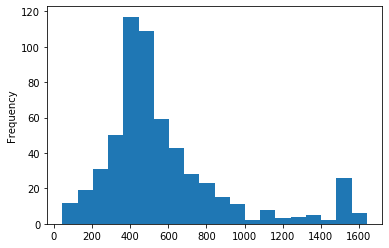

In [22]:
df_appliques.groupby("txt_node_id")["txt_node_id"].count().plot.hist(bins=20)

In [53]:
df_appliques.groupby("txt_node_id")["txt_node_id"].count().sort_values(ascending= False).describe()

count     573.000000
mean      575.815009
std       329.903420
min        45.000000
25%       384.000000
50%       483.000000
75%       667.000000
max      1641.000000
Name: txt_node_id, dtype: float64

## Statuts des clients

In [23]:
df_nodes #Statut des clients : SITE, GROUP ou ABOVE_SITE

,id,node_status
0,2c90f5883f44af68013f564a1326558a,SITE
1,2c90f5883fcf3281013fe7c2f0eb4dbe,SITE
2,2c90f588404b48480140ce4d7d301013,SITE
3,2c90f5884109d2c401410c40ae942d95,SITE
4,2c90f5884109d2c401410c4434a433a6,SITE
5,2c90f5884109d2c401410c44a3493440,SITE
6,2c90f588429b4a8a01429f3055457934,SITE
7,2c90f588429b4a8a01429f30cc007a32,SITE
8,2c90f58845004b4601451c44694220d7,SITE
9,2c90f58845004b4601453c94255e139f,GROUP


In [24]:
df_nodes.groupby("node_status")["node_status"].count().sort_values(ascending= False)

node_status
SITE          586
GROUP           9
ABOVE_SITE      2
Name: node_status, dtype: int64

In [25]:
df_nodes[df_nodes['id'] =='4028807d16245e4d01162478b54b7da4']

,id,node_status
224,4028807d16245e4d01162478b54b7da4,SITE


# Questions du formulaire

In [26]:
df_formulaire_question #contenu des questions

,aide,enonce_groupe,enonce_site,type,unite,id
0,NaN,Intervenez-vous (vos salariés) sur des matériaux amiantés (travaux de maintenance de bâtiments ou de machines pouvant contenir de l'amiante...) ?,Intervenez-vous (vos salariés) sur des matériaux amiantés (travaux de maintenance de bâtiments ou de machines pouvant contenir de l'amiante...) ?,1,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,NaN,"De quelles sources (scellées, non scellées) ou appareils (accélérateurs de particules, générateurs de rayons X) s'agit-il?","De quelles sources (scellées, non scellées) ou appareils (accélérateurs de particules, générateurs de rayons X) s'agit-il?",0,NaN,01161AAA0B6D1345DD8FE4E481144D84
2,NaN,NaN,Le site est-il localisé sur une zone sismique ? Merci de préciser le type de classe.,1,NaN,013D407166EC4FA56EB1E1F8CBE183B9
3,NaN,Etes-vous soumis ou avez-vous un plan de prévention des risques naturels (PPRN) ?,Etes-vous soumis ou avez-vous un plan de prévention des risques naturels (PPRN) ?,1,NaN,02522A2B2726FB0A03BB19F2D8D9524D
4,NaN,NaN,Plans et localisation des bâtiments communiqués à Tennaxia,0,NaN,0266E33D3F546CB5436A10798E657D97
5,NaN,Effectuez-vous des opérations de chargement / déchargement / transport de matières dangereuses sur l'un de vos sites ?,Effectuez-vous des opérations de chargement / déchargement / transport de matières dangereuses sur le site ?,1,NaN,02E74F10E0327AD868D138F2B4FDD6F0
6,NaN,Quels sont les numéros des tableaux de maladie professionnelle concernés ?,Quels sont les numéros des tableaux de maladie professionnelle concernés ?,0,NaN,0336DCBAB05B9D5AD24F4333C7658A0E
7,NaN,NaN,Listez l'ensemble des arrêtés préfectoraux d'autorisation d'exploiter et des arrêtés complémentaires applicables à votre site et/ou les récépissés de déclaration.\nMerci d'indiquer en commentaire le libellé et la date de chaque texte.,0,NaN,03AFDBD66E7929B125F8597834FA83A4
8,"Vous pouvez renseigner ces informations dans un fichier Excel comportant, en ligne, la liste des informations demandées et, une colonne pour chaque bâtiment et mettre ce fichier en pièce jointe de votre réponse.\nLe cas échéant, indiquer la date de dépôt de la demande de permis de construire ou de la déclaration préalable.",Merci de joindre un fichier Excel avec l'ensemble des informations suivantes sur l'historique des différents bâtiments :\n - date(s) d'achat\n - date(s) de construction\n - date(s) des éventuels travaux d'extension\n - date(s) des éventuels travaux de rénovation importants (nécessitant un permis de construire ou une déclaration préalable),"Merci de joindre un fichier Excel avec l'ensemble des informations suivantes sur l'historique, l'usage et la superficie de chaque bâtiment :\nHistorique des différents bâtiments\n - date(s) d'achat\n - date(s) de construction\n - date(s) des éventuels travaux d'extension\n - date(s) des éventuels travaux de rénovation importants (nécessitant un permis de construire ou une déclaration préalable)\n\nUsage des différents bâtiments\n - Bureaux ?\n - Industriel ?\n - Commercial ?\n - Locaux techn...",0,NaN,03C6B06952C750899BB03D998E631860
9,"Moteurs électriques, lampes, circulateurs, transformateurs, climatiseurs, appareils de chauffage ou de refroidissement, appareils ménagers...",NaN,"Faites-vous de la mise sur le marché et/ou mise en service de produits consommateurs d'énergie ?\nSi oui, précisez lesquels dans le champ commentaire.",1,NaN,042F2AFDAD0611E7B3CE001851D17886


In [27]:
df_formulaire_question.groupby("type")["type"].count().sort_values(ascending= False)

type
1    233
0     39
2     25
4     10
3      6
5      3
Name: type, dtype: int64

In [61]:
df_formulaire_question[df_formulaire_question["type"]==3]

,aide,enonce_groupe,enonce_site,type,unite,id
14,NaN,Précisez les modes d'élimination des transformateurs (l'intégralité des transformateurs ont été remplacés OU l'huile a été décontaminée mais le transformateur est d'origine),Précisez les modes d'élimination des transformateurs (l'intégralité des transformateurs ont été remplacés OU l'huile a été décontaminée mais le transformateur est d'origine),3,NaN,069059B7EF840F0C74A814EC9237B6EC
79,Indiquez dans le commentaire combien de personnes environ dépendent d'une même fosse. \n\nPour information 1eh (équivalent habitant) correspond à 60g de DBO5 par jour.,Quelle est la charge brute de pollution organique de DBO5 ?,"Quelle est la charge brute de pollution organique de DBO5 ? (< = ou > 1,2 kg/jour)",3,NaN,35F4A8D465E6E1EDC05F3D8AB658C551
119,NaN,"Cette opération a-t-elle été menée en nom propre ou en partenariat avec un fournisseur ""obligé"" ?","Cette opération a-t-elle été menée en nom propre ou en partenariat avec un fournisseur ""obligé"" ?",3,NaN,63923F49E5241343AA7ACB6A06A751E7
154,NaN,"Avez-vous au moins un site classé SEVESO ? Si oui, précisez seuil maximal présent ?","Le site est-il classé SEVESO ? Si oui, précisez seuil bas ou seuil haut ?",3,NaN,7F1DE29E6DA19D22B51C68001E7E0E54
192,NaN,Quels sont les modes d'élimination (incinération…) de ces sous-produits (interne ou externe) ?,Quels sont les modes d'élimination (incinération…) de ces sous-produits (interne ou externe) ?,3,NaN,A0A080F42E6F13B3A2DF133F073095DD
308,NaN,NaN,Quelle est la quantité mensuelle de déchets d'activité de soins produite ? (infirmerie…),3,NaN,F899139DF5E1059396431415E770C6DD


In [29]:
df_formulaire_question.groupby("unite")["unite"].count().sort_values(ascending= False)

unite
t            3
t/an         2
sites        1
personnes    1
pers./m²     1
m³           1
Name: unite, dtype: int64

In [30]:
df_formulaire_question.groupby("unite")["unite"].count().sort_values(ascending= False)

unite
t            3
t/an         2
sites        1
personnes    1
pers./m²     1
m³           1
Name: unite, dtype: int64

In [31]:
print(sum(pd.isnull(df_formulaire_question['enonce_groupe'])), sum(pd.isnull(df_formulaire_question['enonce_site'])))

34 4


In [32]:
df_formulaire_questionnaire #grandes parties du questionnaire

,couleur,nom,position,node_id,id
0,#999999,INFORMATIONS GENERALES,0,4028807d16245e4d0116247888d0793d,5E0F845AA9A537AAD2DD3E0FB248A44E
1,#009900,ENVIRONNEMENT,2,4028807d16245e4d0116247888d0793d,77D3F03B15B1CFEE59C5D16D0BE37123
2,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
3,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
4,#6600CC,SURETE - MALVEILLANCE,4,4028807d16245e4d0116247888d0793d,C540C42A14EA11E9B4A4FA163E3BC92C
5,#ff6600,HSE,1,4028807d16245e4d0116247888d0793d,D597C271A829F7FBE0C01FD4109854EE


In [33]:
df_formulaire_questionnaire_pages  #ordre des pages d’un questionnaire
#questionnaire_id = id de la partie dans la base précédente ?

,page_order,questionnaire_id,pages_id
0,7,7FAE1993C5027CE676D551A2BDFE6C04,03C4AD7888A7E4C54975A8DDC0B7FD89
1,6,7FAE1993C5027CE676D551A2BDFE6C04,07B1E039C8678D21175FB8EBBB4E06FC
2,5,7FAE1993C5027CE676D551A2BDFE6C04,0EDF28B413735DC197E24A5AA46B188C
3,9,77D3F03B15B1CFEE59C5D16D0BE37123,0EED0BAB1E6211E9997EFA163E3BC92C
4,8,ABD03ACB00C00FE88EB701362C91F463,10EF07CC6EEC0BD16EFC9069C8D4C02D
5,4,7FAE1993C5027CE676D551A2BDFE6C04,1D74D37FA4D45B83F416CDDB677E6EBA
6,2,5E0F845AA9A537AAD2DD3E0FB248A44E,2432C61399654853656C3A9E96D691A8
7,0,ABD03ACB00C00FE88EB701362C91F463,29C2FB940CD1EAF39D8BF1AFCA0E23B3
8,3,ABD03ACB00C00FE88EB701362C91F463,2A8F77A459506726759AE4FB9C805504
9,4,77D3F03B15B1CFEE59C5D16D0BE37123,37DFB171EB069D6050FF04026321A82E


In [34]:
df_formulaire_questionnaire_pages["pages_id"].nunique() #A quoi ça sert ??

44

In [35]:
df_merge_pages = pd.merge(df_formulaire_questionnaire_pages, df_formulaire_questionnaire, how='left', left_on=['questionnaire_id'], right_on=['id'])

In [36]:
df_merge_pages

,page_order,questionnaire_id,pages_id,couleur,nom,position,node_id,id
0,7,7FAE1993C5027CE676D551A2BDFE6C04,03C4AD7888A7E4C54975A8DDC0B7FD89,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
1,6,7FAE1993C5027CE676D551A2BDFE6C04,07B1E039C8678D21175FB8EBBB4E06FC,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
2,5,7FAE1993C5027CE676D551A2BDFE6C04,0EDF28B413735DC197E24A5AA46B188C,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
3,9,77D3F03B15B1CFEE59C5D16D0BE37123,0EED0BAB1E6211E9997EFA163E3BC92C,#009900,ENVIRONNEMENT,2,4028807d16245e4d0116247888d0793d,77D3F03B15B1CFEE59C5D16D0BE37123
4,8,ABD03ACB00C00FE88EB701362C91F463,10EF07CC6EEC0BD16EFC9069C8D4C02D,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
5,4,7FAE1993C5027CE676D551A2BDFE6C04,1D74D37FA4D45B83F416CDDB677E6EBA,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
6,2,5E0F845AA9A537AAD2DD3E0FB248A44E,2432C61399654853656C3A9E96D691A8,#999999,INFORMATIONS GENERALES,0,4028807d16245e4d0116247888d0793d,5E0F845AA9A537AAD2DD3E0FB248A44E
7,0,ABD03ACB00C00FE88EB701362C91F463,29C2FB940CD1EAF39D8BF1AFCA0E23B3,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
8,3,ABD03ACB00C00FE88EB701362C91F463,2A8F77A459506726759AE4FB9C805504,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
9,4,77D3F03B15B1CFEE59C5D16D0BE37123,37DFB171EB069D6050FF04026321A82E,#009900,ENVIRONNEMENT,2,4028807d16245e4d0116247888d0793d,77D3F03B15B1CFEE59C5D16D0BE37123


In [37]:
df_merge_pages.groupby("nom")["nom"].count().sort_values(ascending= False)

nom
SECURITE                  11
ENVIRONNEMENT             11
ENERGIE                    9
SURETE - MALVEILLANCE      5
HSE                        5
INFORMATIONS GENERALES     3
Name: nom, dtype: int64

# Questions à choix

In [38]:
df_formulaire_question_choix  #id des choix pour les questions de type choix
#question_id à joindre avec id de df_formulaire_question

,choix_order,choix_id,question_id
0,0,4C6AE4E18514140E78D6116F51E7DDEB,006F52E9102A8D3BE2FE5614F42BA989
1,1,C3AE13B68907389B5DAAD4C19E4E9816,006F52E9102A8D3BE2FE5614F42BA989
2,0,83DFF3966C9101CA46EDEBCF7C685810,013D407166EC4FA56EB1E1F8CBE183B9
3,1,A7ACD0346943D0C4BF2AB3B45C074E7C,013D407166EC4FA56EB1E1F8CBE183B9
4,0,C6212798B661ABC546CD2B6F5B6F596D,02522A2B2726FB0A03BB19F2D8D9524D
5,1,3816C6A22A60E9F21430954151BA8D1A,02522A2B2726FB0A03BB19F2D8D9524D
6,0,FA4A1C04C8B1B7A5FE484351EB44BCCA,02E74F10E0327AD868D138F2B4FDD6F0
7,1,60B25DB9C1A9AC1E41B9DF4E85AE79EB,02E74F10E0327AD868D138F2B4FDD6F0
8,0,042FBFBEAD0611E7B3CE001851D17886,042F2AFDAD0611E7B3CE001851D17886
9,1,042FC844AD0611E7B3CE001851D17886,042F2AFDAD0611E7B3CE001851D17886


In [39]:
df_formulaire_question_choix['question_id'].nunique()  #Nombre de questions à choix

264

In [54]:
df_formulaire_question_choix[df_formulaire_question_choix["choix_order"]==1]

,choix_order,choix_id,question_id
1,1,C3AE13B68907389B5DAAD4C19E4E9816,006F52E9102A8D3BE2FE5614F42BA989
3,1,A7ACD0346943D0C4BF2AB3B45C074E7C,013D407166EC4FA56EB1E1F8CBE183B9
5,1,3816C6A22A60E9F21430954151BA8D1A,02522A2B2726FB0A03BB19F2D8D9524D
7,1,60B25DB9C1A9AC1E41B9DF4E85AE79EB,02E74F10E0327AD868D138F2B4FDD6F0
9,1,042FC844AD0611E7B3CE001851D17886,042F2AFDAD0611E7B3CE001851D17886
11,1,102B6C73E772D38096641B584E577164,045117B0E0A11A242B9765E79CBF113F
13,1,0FEE4EDA72ECCD97097EE215691F1AD5,060AD92489947D410D897474079C1477
15,1,E0B65D031BA59F7B8207CCD1D9094C7E,06138BC5AF6023646EDE0E1F7C1EAC75
17,1,9BAE8312987B08A189219947E4F0E397,069059B7EF840F0C74A814EC9237B6EC
19,1,B764E0411569D915B0D2D072A491130C,0777D5C17D4066B82AB86DFF8A46AF6F


In [41]:
df_formulaire_question_choix.groupby("choix_order")["choix_order"].count().sort_values(ascending= False)

choix_order
1    264
0    264
2     16
3     12
4      9
5      5
Name: choix_order, dtype: int64

# Réponses

In [42]:
df_formulaire_reponse
#node_id: id du client

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,scellées pour RX,\0,NaN,01161AAA0B6D1345DD8FE4E481144D84
2,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
3,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
4,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,"nous recevons des matières dangereuses (gazole, solvant, acide,...) en grande quantité et nous expédions/transportons instersite (venissieux/st priest, La valbonne) de petites quantités ~1000L",02E74F10E0327AD868D138F2B4FDD6F0
5,2c90f5883f44af68013f564a1326558a,amiante,\0,NaN,0336DCBAB05B9D5AD24F4333C7658A0E
6,2c90f5883f44af68013f564a1326558a,24bcb84b-9dba-22aa-3603-921120da5a89,\0,NaN,045117B0E0A11A242B9765E79CBF113F
7,2c90f5883f44af68013f564a1326558a,0fee4eda-72ec-cd97-097e-e215691f1ad5,\0,NaN,060AD92489947D410D897474079C1477
8,2c90f5883f44af68013f564a1326558a,Tour aérorefrigérante cellule moteur_2921,\0,NaN,072B030BA126B2F4B2374F342BE9ED44
9,2c90f5883f44af68013f564a1326558a,b764e041-1569-d915-b0d2-d072a491130c,\0,NaN,0777D5C17D4066B82AB86DFF8A46AF6F


In [43]:
print(df_formulaire_reponse["node_id"].nunique(), df_formulaire_reponse["question_id"].nunique())

597 316


In [44]:
print(sum(pd.isnull(df_formulaire_reponse['valeur_actee'])), sum(pd.isnull(df_formulaire_reponse['commentaire_acte'])))

23303 98160


In [45]:
df_formulaire_reponse.groupby("non_concerne_acte")["non_concerne_acte"].count().sort_values(ascending= False)

non_concerne_acte
\0    114971
       2109
Name: non_concerne_acte, dtype: int64

## Caractéristiques du nombre de réponses répondues 

In [65]:
df_formulaire_reponse.groupby("node_id")["node_id"].count().sort_values(ascending= False).describe()

count    597.000000
mean     196.113903
std       56.316881
min        1.000000
25%      160.000000
50%      208.000000
75%      236.000000
max      285.000000
Name: node_id, dtype: float64

In [80]:
df_formulaire_reponse.groupby("node_id")["node_id"].count().quantile(q=0.051)

99.792

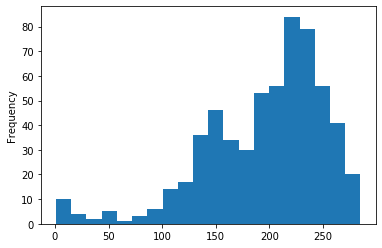

In [47]:
df_formulaire_reponse.groupby("node_id")["node_id"].count().plot.hist(bins=20)   
#Eliminer les questionnaires avec moins de 100 réponses ?

## Partie pas importante sur les pages du questionnaires

In [48]:
df_formulaire_page_questions

,question_order,page_id,question_id
0,9,47F7C1F4C2D5515A0CD260621108E4CF,006F52E9102A8D3BE2FE5614F42BA989
1,1,80203BE21F599D39C8B7B3CB06ED3D54,01161AAA0B6D1345DD8FE4E481144D84
2,11,C5419C4A14EA11E9B4A4FA163E3BC92C,01161AAA0B6D1345DD8FE4E481144D84
3,8,F5CDBDCDF75DFAA1A6BA541A72E4EAD8,013D407166EC4FA56EB1E1F8CBE183B9
4,4,F5CDBDCDF75DFAA1A6BA541A72E4EAD8,02522A2B2726FB0A03BB19F2D8D9524D
5,0,AD0BD04A2E7C265BB80D57AF6F93CEDB,0266E33D3F546CB5436A10798E657D97
6,0,7F0CAA108998908EB978E50D7971B666,02E74F10E0327AD868D138F2B4FDD6F0
7,5,9F8A7CFBD723CC27F9120A8FC895DC61,0336DCBAB05B9D5AD24F4333C7658A0E
8,4,72F5B7EEB6C88A541413B840C52EA8D8,03AFDBD66E7929B125F8597834FA83A4
9,4,807897544A88123E07CB0F01065DF210,03AFDBD66E7929B125F8597834FA83A4


In [49]:
df_formulaire_page_questions["page_id"].nunique()

44

In [50]:
df_formulaire_page_questions["question_id"].nunique()

321